In [40]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'classified_cells.csv'

# Create a DataFrame from the CSV file
try:
    df = pd.read_csv(csv_file_path)
    print("DataFrame created successfully:")
    # print(df)
except FileNotFoundError:
    print(f"Error: File not found at {csv_file_path}")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {csv_file_path} is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the CSV file at {csv_file_path}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


DataFrame created successfully:


In [41]:
df = df.drop('vector_features', axis=1)


In [42]:
# Extract 'sample_name' from 'image_path'
df['sample_name'] = df['image_path'].str.extract(r'sma/(.*?)/')

In [43]:
df

,image_path,true_label,predicted_probability,sample_name
0,RCM_cells_cleaned_paper_final/non-sma/290919-0...,0,0.000324,290919-04
1,RCM_cells_cleaned_paper_final/non-sma/290919-0...,0,0.204119,290919-04
2,RCM_cells_cleaned_paper_final/non-sma/290919-0...,0,0.007616,290919-04
3,RCM_cells_cleaned_paper_final/non-sma/290919-0...,0,0.006765,290919-04
4,RCM_cells_cleaned_paper_final/non-sma/290919-0...,0,0.000019,290919-04
...,...,...,...,...
12416,RCM_cells_cleaned_paper_final/sma/080419-4r1/4...,1,0.999999,080419-4r1
12417,RCM_cells_cleaned_paper_final/sma/080419-4r1/4...,1,0.003443,080419-4r1
12418,RCM_cells_cleaned_paper_final/sma/080419-4r1/2...,1,0.782577,080419-4r1
12419,RCM_cells_cleaned_paper_final/sma/080419-4r1/3...,1,0.999935,080419-4r1


In [44]:
# Assuming 'predicted_probability' is the name of the column in your DataFrame
threshold = 0.5
df['predicted_label'] = df['predicted_probability'].apply(lambda x: 1 if x > threshold else 0)


In [45]:
# Create a new DataFrame result_df
result_df = df.groupby('sample_name').agg({
    'true_label': 'mean',
}).reset_index()

# Rename the 'true_label' column to 'average_true_label'
result_df = result_df.rename(columns={'true_label': 'true_label'})

In [46]:
# Merge with the original DataFrame to ensure correct alignment
result_df = result_df.merge(
    df[df['predicted_probability'].round() == 1].groupby('sample_name').size().reset_index(name='count_sma_cells'),
    on='sample_name', how='left'
)

In [47]:

result_df = result_df.merge(
    df[df['predicted_probability'].round() == 0].groupby('sample_name').size().reset_index(name='count_nonsma_cells'),
    on='sample_name', how='left'
)


In [48]:
# Calculate the percentage of sma cells
result_df['percentage_of_sma_cells'] = (result_df['count_sma_cells'] / (result_df['count_sma_cells'] + result_df['count_nonsma_cells'])) * 100

# Fill NaN values with 0 (in case there are no instances of sma or nonsma cells)
result_df = result_df.fillna(0)

print(result_df)

    sample_name  true_label  count_sma_cells  count_nonsma_cells  \
0     010819-06         0.0             21.0                  54   
1     010819-12         0.0             24.0                   7   
2     020418-15         0.0              8.0                  37   
3    020418-2r3         1.0             93.0                  17   
4     021018-12         0.0              4.0                  86   
..          ...         ...              ...                 ...   
121   310719-04         0.0             46.0                 113   
122   310719-08         0.0              1.0                 128   
123   310719-10         0.0             18.0                  55   
124   310719-12         0.0             53.0                  69   
125   310719-15         0.0              9.0                  46   

     percentage_of_sma_cells  
0                  28.000000  
1                  77.419355  
2                  17.777778  
3                  84.545455  
4                   4.444444

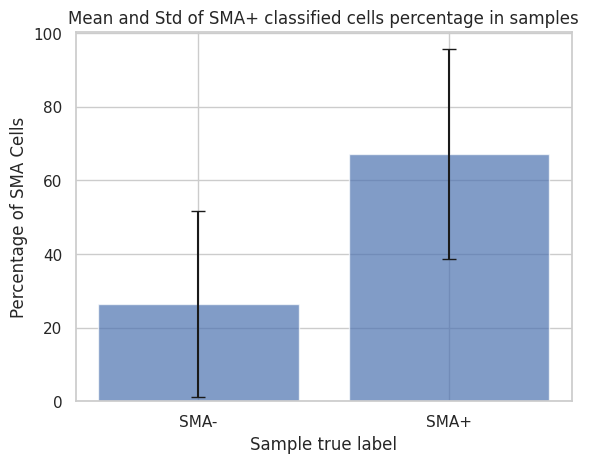

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Group by 'avg_actual_label' and calculate mean and standard deviation of 'percentage_of_sma_cells'
grouped_df = result_df.groupby('true_label')['percentage_of_sma_cells'].agg(['mean', 'std']).reset_index()

# Plotting
labels = ['SMA-', 'SMA+']
means = grouped_df['mean']
std_devs = grouped_df['std']

fig, ax = plt.subplots()
ax.bar(labels, means, yerr=std_devs, capsize=5, align='center', alpha=0.7)

ax.set_ylabel('Percentage of SMA Cells')
ax.set_title('Mean and Std of SMA+ classified cells percentage in samples')
ax.set_xlabel('Sample true label')  # Add this line to set x-axis label

plt.show()

In [50]:
result_df

,sample_name,true_label,count_sma_cells,count_nonsma_cells,percentage_of_sma_cells
0,010819-06,0.0,21.0,54,28.000000
1,010819-12,0.0,24.0,7,77.419355
2,020418-15,0.0,8.0,37,17.777778
3,020418-2r3,1.0,93.0,17,84.545455
4,021018-12,0.0,4.0,86,4.444444
...,...,...,...,...,...
121,310719-04,0.0,46.0,113,28.930818
122,310719-08,0.0,1.0,128,0.775194
123,310719-10,0.0,18.0,55,24.657534
124,310719-12,0.0,53.0,69,43.442623


Find the correlation or any relationship between PCV value and percentage of SMA+ classified cells
- First need to remove all rows where PCV is N/A

In [51]:
# Load the 'paper_data_analysis.csv' into a dataframe called df_a
df_a = pd.read_csv('paper_data_analysis.csv')

# Assuming you already have a dataframe named result_df
# Merge result_df with df_a based on the 'sample_name' column
result_df_a = result_df.merge(df_a[['FASt-Mal-Code', 'PCV']], left_on='sample_name', right_on='FASt-Mal-Code', how='left')

# Rename the 'PCV' column in result_df to avoid conflicts
result_df_a.rename(columns={'PCV_x': 'PCV_result_df', 'PCV_y': 'PCV_df_a'}, inplace=True)

# Merge result_df with df_a based on the 'sample_name' column
result_df_a = result_df_a.merge(df_a[['FASt-Mal-Code', 'SMA']], left_on='sample_name', right_on='FASt-Mal-Code', how='left')

# Merge result_df with df_a based on the 'sample_name' column
result_df_a = result_df_a.merge(df_a[['FASt-Mal-Code', 'Diagnosis']], left_on='sample_name', right_on='FASt-Mal-Code', how='left')


# Display the updated result_df
print(result_df_a.head())

  sample_name  true_label  count_sma_cells  count_nonsma_cells  \
0   010819-06         0.0             21.0                  54   
1   010819-12         0.0             24.0                   7   
2   020418-15         0.0              8.0                  37   
3  020418-2r3         1.0             93.0                  17   
4   021018-12         0.0              4.0                  86   

   percentage_of_sma_cells FASt-Mal-Code_x   PCV FASt-Mal-Code_y  SMA  \
0                28.000000       010819-06  13.0       010819-06   NO   
1                77.419355       010819-12  15.0       010819-12   NO   
2                17.777778       020418-15   NaN       020418-15   NO   
3                84.545455      020418-2r3  14.0      020418-2r3  SMA   
4                 4.444444       021018-12  20.0       021018-12   NO   

  FASt-Mal-Code                   Diagnosis  
0     010819-06  No Malaria, Severe Anaemia  
1     010819-12  No Malaria, Severe Anaemia  
2     020418-15      No Ma

In [52]:
result_df_a

,sample_name,true_label,count_sma_cells,count_nonsma_cells,percentage_of_sma_cells,FASt-Mal-Code_x,PCV,FASt-Mal-Code_y,SMA,FASt-Mal-Code,Diagnosis
0,010819-06,0.0,21.0,54,28.000000,010819-06,13.0,010819-06,NO,010819-06,"No Malaria, Severe Anaemia"
1,010819-12,0.0,24.0,7,77.419355,010819-12,15.0,010819-12,NO,010819-12,"No Malaria, Severe Anaemia"
2,020418-15,0.0,8.0,37,17.777778,020418-15,NaN,020418-15,NO,020418-15,"No Malaria, No Anaemia"
3,020418-2r3,1.0,93.0,17,84.545455,020418-2r3,14.0,020418-2r3,SMA,020418-2r3,Severe Malaria Anaemia
4,021018-12,0.0,4.0,86,4.444444,021018-12,20.0,021018-12,NO,021018-12,"No Malaria, Severe Anaemia"
...,...,...,...,...,...,...,...,...,...,...,...
121,310719-04,0.0,46.0,113,28.930818,310719-04,35.0,310719-04,NO,310719-04,"No Malaria, No Anaemia"
122,310719-08,0.0,1.0,128,0.775194,310719-08,33.0,310719-08,NO,310719-08,"No Malaria, No Anaemia"
123,310719-10,0.0,18.0,55,24.657534,310719-10,22.0,310719-10,NO,310719-10,"No Malaria, Anaemia"
124,310719-12,0.0,53.0,69,43.442623,310719-12,20.0,310719-12,NO,310719-12,"No Malaria, Severe Anaemia"


In [53]:
import numpy as np
result_df_a = result_df_a.drop('FASt-Mal-Code_x', axis=1)
result_df_a = result_df_a.drop('FASt-Mal-Code_y', axis=1)
result_df_a['MATCH'] = np.where(((result_df_a['SMA'] == 'NO') & (result_df_a['true_label'] == 0)) | ((result_df_a['SMA'] == 'SMA') & (result_df_a['true_label'] == 1)), True, False)
result_df_a
result_df_a['SMA'] = result_df_a['SMA'].replace({'SMA': 'SMA+', 'NO': 'SMA-'})
result_df_a = result_df_a.drop('FASt-Mal-Code', axis=1)




In [54]:
result_df_a

,sample_name,true_label,count_sma_cells,count_nonsma_cells,percentage_of_sma_cells,PCV,SMA,Diagnosis,MATCH
0,010819-06,0.0,21.0,54,28.000000,13.0,SMA-,"No Malaria, Severe Anaemia",True
1,010819-12,0.0,24.0,7,77.419355,15.0,SMA-,"No Malaria, Severe Anaemia",True
2,020418-15,0.0,8.0,37,17.777778,NaN,SMA-,"No Malaria, No Anaemia",True
3,020418-2r3,1.0,93.0,17,84.545455,14.0,SMA+,Severe Malaria Anaemia,True
4,021018-12,0.0,4.0,86,4.444444,20.0,SMA-,"No Malaria, Severe Anaemia",True
...,...,...,...,...,...,...,...,...,...
121,310719-04,0.0,46.0,113,28.930818,35.0,SMA-,"No Malaria, No Anaemia",True
122,310719-08,0.0,1.0,128,0.775194,33.0,SMA-,"No Malaria, No Anaemia",True
123,310719-10,0.0,18.0,55,24.657534,22.0,SMA-,"No Malaria, Anaemia",True
124,310719-12,0.0,53.0,69,43.442623,20.0,SMA-,"No Malaria, Severe Anaemia",True


In [55]:
result_df_a.to_csv('paper_samples_final.csv', index=False)


In [56]:
result_df_a = result_df_a[result_df_a['Diagnosis'] != 'Unclassified']

In [57]:
result_df_a['Diagnosis'] = result_df_a['Diagnosis'].replace('No Malaria, No Anaemia', 'Malaria Negative, No Anaemia')

result_df_a['Diagnosis'] = result_df_a['Diagnosis'].replace('No Malaria, Anaemia', 'Malaria Negative, Anaemia')

result_df_a['Diagnosis'] = result_df_a['Diagnosis'].replace('No Malaria, Severe Anaemia', 'Malaria Negative, Severe Anaemia')

result_df_a['Diagnosis'] = result_df_a['Diagnosis'].replace('Malaria, No Anaemia', 'Malaria Positive, No Anaemia')

result_df_a['Diagnosis'] = result_df_a['Diagnosis'].replace('Severe Malaria Anaemia', 'Malaria Positive, Severe Malaria Anaemia')

In [58]:
result_df_a

,sample_name,true_label,count_sma_cells,count_nonsma_cells,percentage_of_sma_cells,PCV,SMA,Diagnosis,MATCH
0,010819-06,0.0,21.0,54,28.000000,13.0,SMA-,"Malaria Negative, Severe Anaemia",True
1,010819-12,0.0,24.0,7,77.419355,15.0,SMA-,"Malaria Negative, Severe Anaemia",True
2,020418-15,0.0,8.0,37,17.777778,NaN,SMA-,"Malaria Negative, No Anaemia",True
3,020418-2r3,1.0,93.0,17,84.545455,14.0,SMA+,"Malaria Positive, Severe Malaria Anaemia",True
4,021018-12,0.0,4.0,86,4.444444,20.0,SMA-,"Malaria Negative, Severe Anaemia",True
...,...,...,...,...,...,...,...,...,...
121,310719-04,0.0,46.0,113,28.930818,35.0,SMA-,"Malaria Negative, No Anaemia",True
122,310719-08,0.0,1.0,128,0.775194,33.0,SMA-,"Malaria Negative, No Anaemia",True
123,310719-10,0.0,18.0,55,24.657534,22.0,SMA-,"Malaria Negative, Anaemia",True
124,310719-12,0.0,53.0,69,43.442623,20.0,SMA-,"Malaria Negative, Severe Anaemia",True


In [59]:
distinct_diagnosis_values = result_df_a['Diagnosis'].unique()

for value in distinct_diagnosis_values:
    print(value)

Malaria Negative, Severe Anaemia
Malaria Negative, No Anaemia
Malaria Positive, Severe Malaria Anaemia
Malaria Positive, No Anaemia
Malaria Positive, Anaemia (no-SMA)
Malaria Negative, Anaemia


In [60]:
result_df_a = result_df_a.dropna()


In [61]:
result_df_a

,sample_name,true_label,count_sma_cells,count_nonsma_cells,percentage_of_sma_cells,PCV,SMA,Diagnosis,MATCH
0,010819-06,0.0,21.0,54,28.000000,13.0,SMA-,"Malaria Negative, Severe Anaemia",True
1,010819-12,0.0,24.0,7,77.419355,15.0,SMA-,"Malaria Negative, Severe Anaemia",True
3,020418-2r3,1.0,93.0,17,84.545455,14.0,SMA+,"Malaria Positive, Severe Malaria Anaemia",True
4,021018-12,0.0,4.0,86,4.444444,20.0,SMA-,"Malaria Negative, Severe Anaemia",True
5,030519-12,0.0,17.0,106,13.821138,35.0,SMA-,"Malaria Negative, No Anaemia",True
...,...,...,...,...,...,...,...,...,...
121,310719-04,0.0,46.0,113,28.930818,35.0,SMA-,"Malaria Negative, No Anaemia",True
122,310719-08,0.0,1.0,128,0.775194,33.0,SMA-,"Malaria Negative, No Anaemia",True
123,310719-10,0.0,18.0,55,24.657534,22.0,SMA-,"Malaria Negative, Anaemia",True
124,310719-12,0.0,53.0,69,43.442623,20.0,SMA-,"Malaria Negative, Severe Anaemia",True


/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


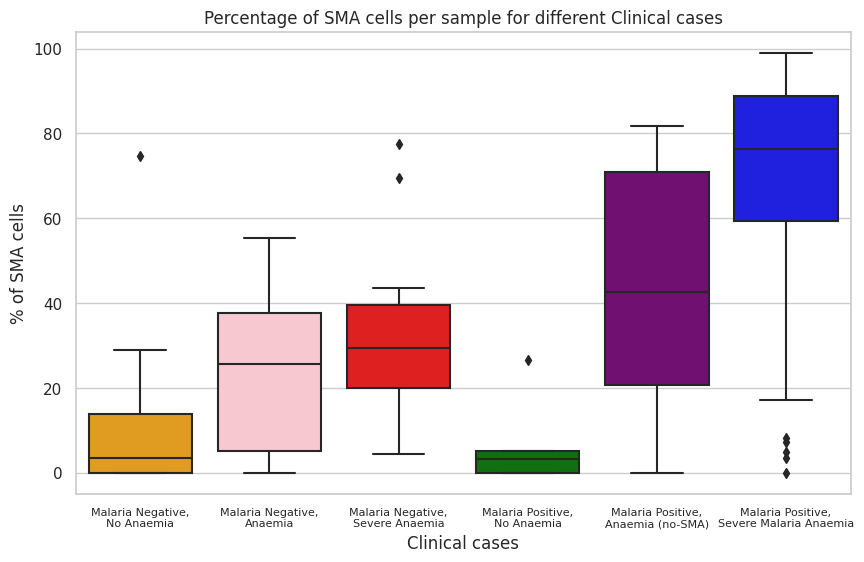

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to map the unique diagnosis values to colors
diagnosis_colors = {
    'Malaria Negative, Severe Anaemia': 'red',
    'Malaria Negative, No Anaemia': 'orange',
    'Malaria Negative, Anaemia': 'pink',
    'Malaria Positive, No Anaemia': 'green',
    'Malaria Positive, Anaemia (no-SMA)': 'purple',
    'Malaria Positive, Severe Malaria Anaemia': 'blue'
}

# Define the correct order of classes
diagnosis_order = [
    'Malaria Negative, No Anaemia',
    'Malaria Negative, Anaemia',
    'Malaria Negative, Severe Anaemia',
    'Malaria Positive, No Anaemia',
    'Malaria Positive, Anaemia (no-SMA)',
    'Malaria Positive, Severe Malaria Anaemia'
]

# Filter the DataFrame based on 'Diagnosis' column values
filtered_df = result_df_a[result_df_a['Diagnosis'].isin(diagnosis_colors.keys())]

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Box Plot with specified order
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diagnosis', y='percentage_of_sma_cells', data=filtered_df, palette=diagnosis_colors, order=diagnosis_order)
plt.title('Percentage of SMA cells per sample for different Clinical cases')

# Adjust x-axis labels with new lines
plt.xticks(rotation=0, fontsize=8)  # Set rotation to 45 and font size to 10
ax = plt.gca()
labels = ax.get_xticklabels()
new_labels = [label.get_text().replace(', ', ',\n') for label in labels]  # Split the text at comma and start a new line
ax.set_xticklabels(new_labels)

# Set y-axis title
plt.ylabel('% of SMA cells within each sample')

# Set x-axis title
plt.xlabel('Clinical cases')

plt.show()


Drop the NA values from PCV

In [79]:
result_df_a.to_csv('paper_PCV_count.csv', index=False)


In [80]:
result_df_a = result_df_a.dropna()


In [81]:
result_df_a

,sample_name,true_label,count_sma_cells,count_nonsma_cells,percentage_of_sma_cells,PCV,SMA,Diagnosis,MATCH
0,010819-06,0.0,21.0,54,28.000000,13.0,SMA-,"Malaria Negative, Severe Anaemia",True
1,010819-12,0.0,24.0,7,77.419355,15.0,SMA-,"Malaria Negative, Severe Anaemia",True
3,020418-2r3,1.0,93.0,17,84.545455,14.0,SMA+,"Malaria Positive, Severe Malaria Anaemia",True
4,021018-12,0.0,4.0,86,4.444444,20.0,SMA-,"Malaria Negative, Severe Anaemia",True
5,030519-12,0.0,17.0,106,13.821138,35.0,SMA-,"Malaria Negative, No Anaemia",True
...,...,...,...,...,...,...,...,...,...
121,310719-04,0.0,46.0,113,28.930818,35.0,SMA-,"Malaria Negative, No Anaemia",True
122,310719-08,0.0,1.0,128,0.775194,33.0,SMA-,"Malaria Negative, No Anaemia",True
123,310719-10,0.0,18.0,55,24.657534,22.0,SMA-,"Malaria Negative, Anaemia",True
124,310719-12,0.0,53.0,69,43.442623,20.0,SMA-,"Malaria Negative, Severe Anaemia",True


In [82]:
result_df_a['PCV'] = result_df_a['PCV'].astype(int)


In [83]:
result_df_a

,sample_name,true_label,count_sma_cells,count_nonsma_cells,percentage_of_sma_cells,PCV,SMA,Diagnosis,MATCH
0,010819-06,0.0,21.0,54,28.000000,13,SMA-,"Malaria Negative, Severe Anaemia",True
1,010819-12,0.0,24.0,7,77.419355,15,SMA-,"Malaria Negative, Severe Anaemia",True
3,020418-2r3,1.0,93.0,17,84.545455,14,SMA+,"Malaria Positive, Severe Malaria Anaemia",True
4,021018-12,0.0,4.0,86,4.444444,20,SMA-,"Malaria Negative, Severe Anaemia",True
5,030519-12,0.0,17.0,106,13.821138,35,SMA-,"Malaria Negative, No Anaemia",True
...,...,...,...,...,...,...,...,...,...
121,310719-04,0.0,46.0,113,28.930818,35,SMA-,"Malaria Negative, No Anaemia",True
122,310719-08,0.0,1.0,128,0.775194,33,SMA-,"Malaria Negative, No Anaemia",True
123,310719-10,0.0,18.0,55,24.657534,22,SMA-,"Malaria Negative, Anaemia",True
124,310719-12,0.0,53.0,69,43.442623,20,SMA-,"Malaria Negative, Severe Anaemia",True


In [84]:
palette = {
    'Malaria Negative, Severe Anaemia': 'red',
    'Malaria Negative, No Anaemia': 'orange',
    'Malaria Negative, Anaemia': 'pink',
    'Malaria Positive, No Anaemia': 'green',
    'Malaria Positive, Anaemia (no-SMA)': 'purple',
    'Malaria Positive, Severe Malaria Anaemia': 'blue'
}

/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

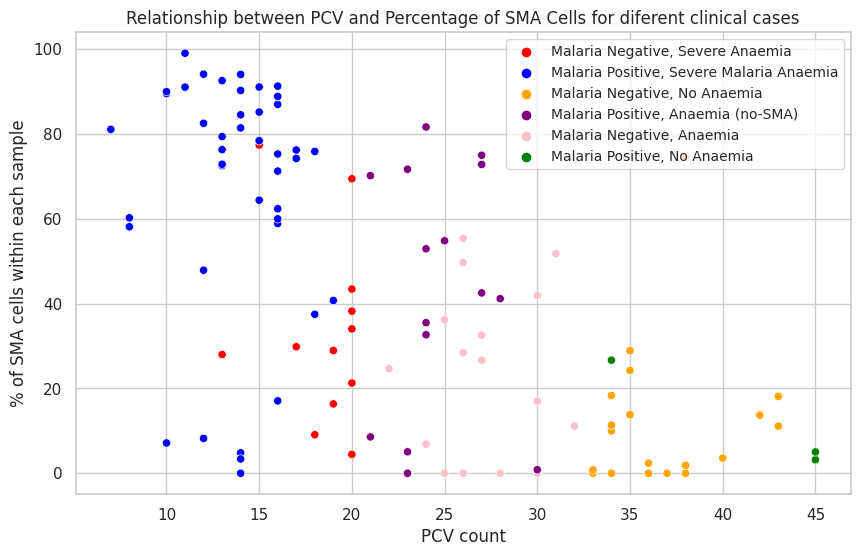

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have result_df_a with the 'PCV' column as integers and no NA values
# Filter the DataFrame based on 'SMA' being equal to 'SMA' or 'NO'
filtered_df = result_df_a[result_df_a['SMA'].isin(['SMA+', 'SMA-'])]

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='PCV', y='percentage_of_sma_cells', hue='Diagnosis', data=filtered_df, palette=palette)

# Set labels and title
plt.xlabel('PCV count')
plt.ylabel('% of SMA cells within each sample')
plt.title('Relationship between PCV and Percentage of SMA Cells for diferent clinical cases')

# Adjust the legend size
plt.legend(fontsize='small')  # You can also use a specific number for size e.g., 8 or 'x-small'

# Show the plot
plt.show()


/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

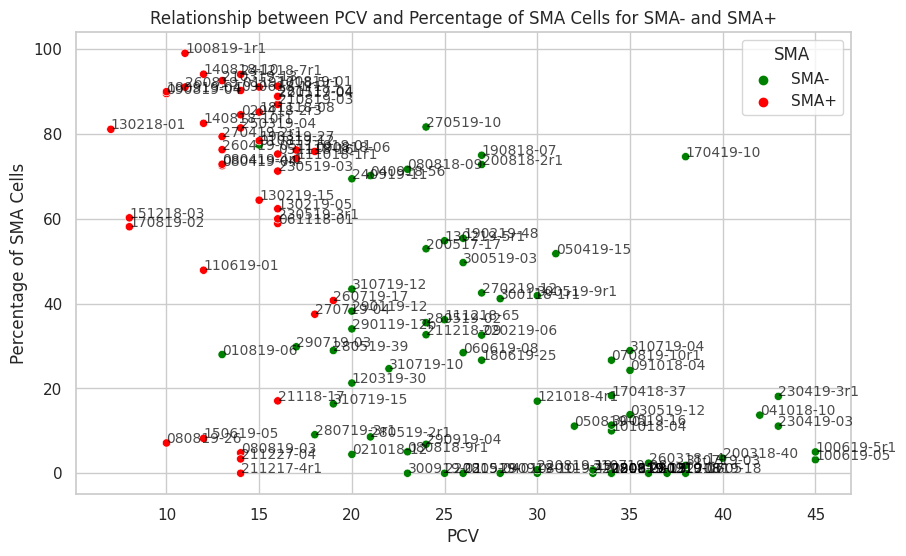

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have result_df_a with the 'PCV' column as integers and no NA values
# Filter the DataFrame based on 'SMA' being equal to 'SMA' or 'NO'
filtered_df = result_df_a[result_df_a['SMA'].isin(['SMA+', 'SMA-'])]

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x='PCV', y='percentage_of_sma_cells', hue='SMA', data=filtered_df, palette={'SMA+': 'red', 'SMA-': 'green'})

# Set labels and title
plt.xlabel('PCV')
plt.ylabel('Percentage of SMA Cells')
plt.title('Relationship between PCV and Percentage of SMA Cells for SMA- and SMA+')

# Customize the legend
legend_labels = {'SMA+': 'SMA+', 'SMA-': 'SMA-'}
handles, _ = scatterplot.get_legend_handles_labels()
plt.legend(handles, [legend_labels[label] for label in filtered_df['SMA'].unique()], title='SMA', loc='upper right')

# Annotate each point with 'sample_name'
for line in range(0, filtered_df.shape[0]):
    scatterplot.text(filtered_df['PCV'].iloc[line], 
                     filtered_df['percentage_of_sma_cells'].iloc[line], 
                     filtered_df['sample_name'].iloc[line], 
                     horizontalalignment='left', 
                     size='small', 
                     color='black',
                     alpha=0.7)

# Show the plot
plt.show()


/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Figure size 1200x800 with 0 Axes>

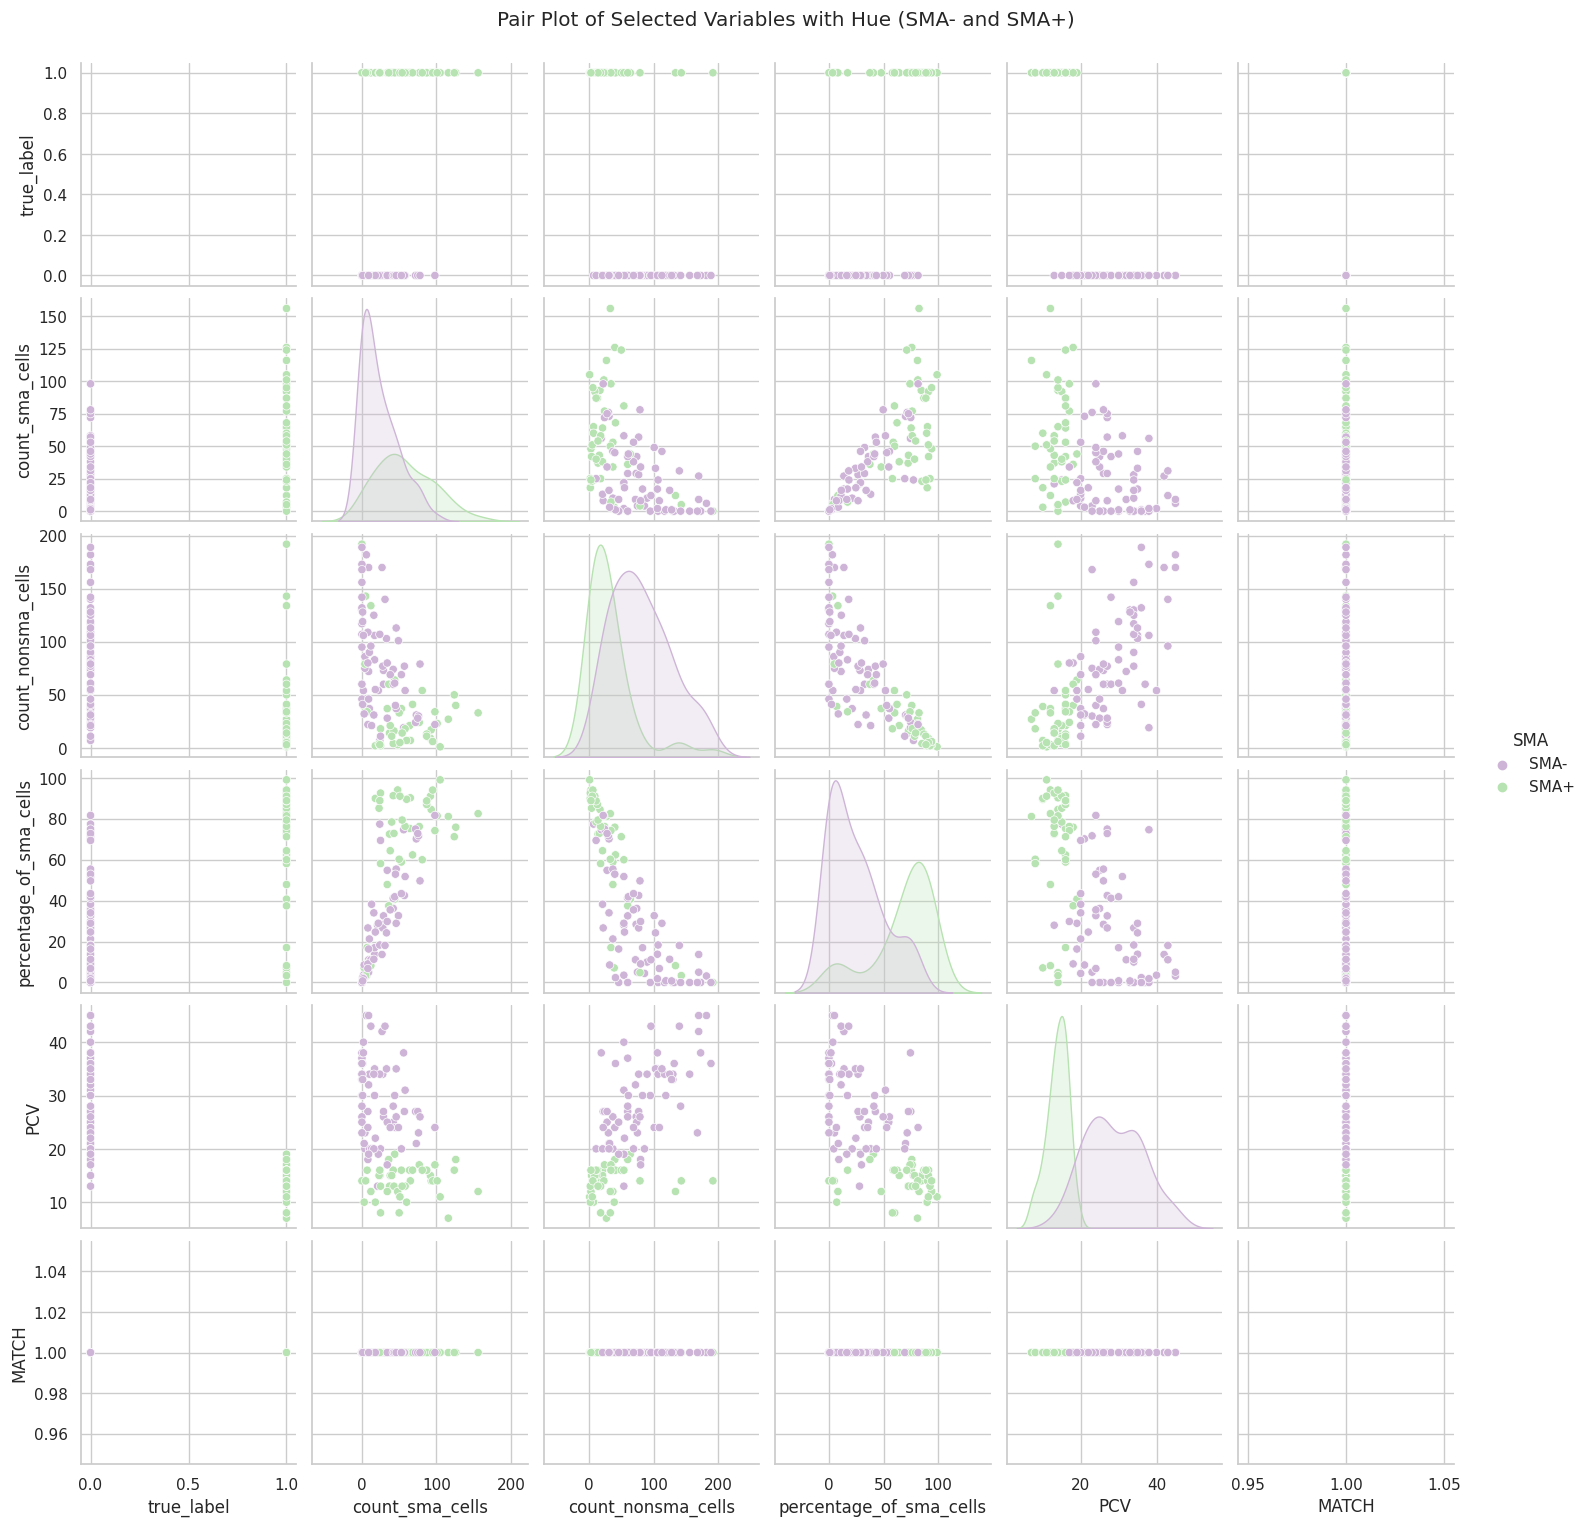

/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


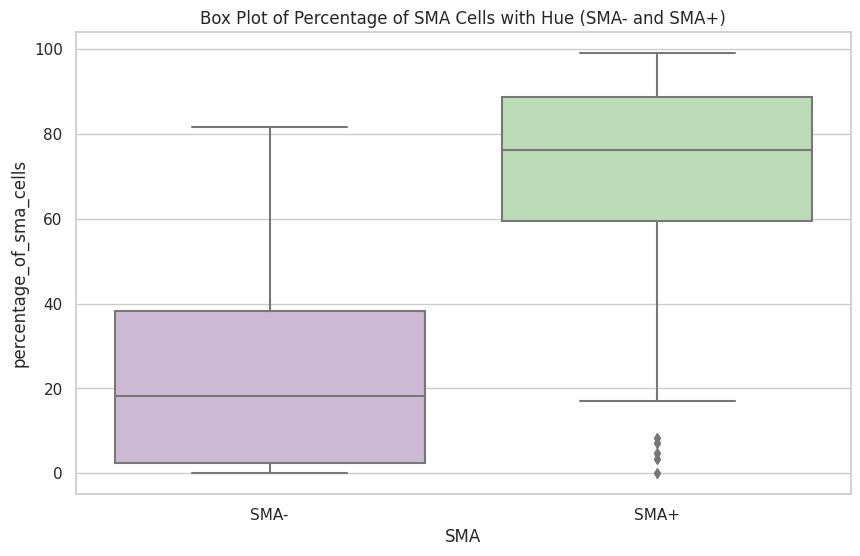

/tmp/ipykernel_1548949/3485250168.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SMA', y='percentage_of_sma_cells', data=filtered_df, ci=None, palette='PRGn')
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

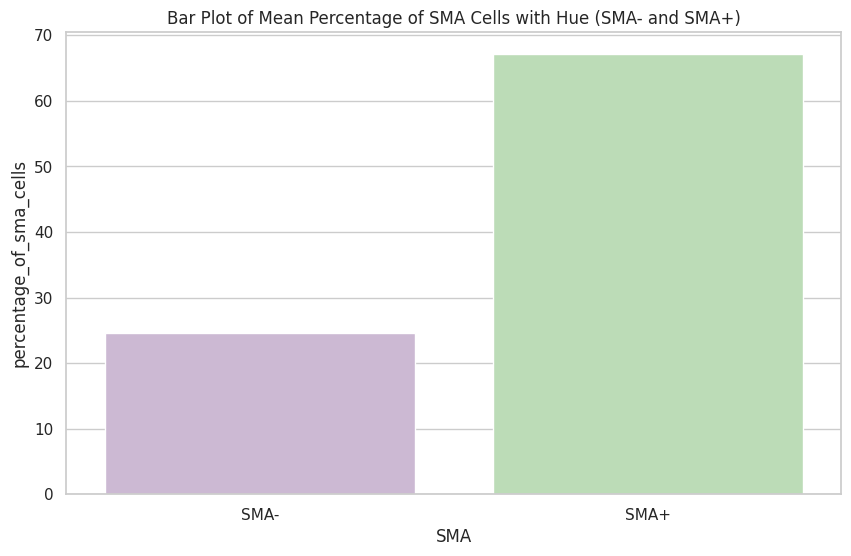

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have result_df_a with the 'PCV' column as integers and no NA values
# Filter the DataFrame based on 'SMA' being equal to 'SMA' or 'NO'
filtered_df = result_df_a[result_df_a['SMA'].isin(['SMA+', 'SMA-'])]

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Pair Plot
plt.figure(figsize=(12, 8))
sns.pairplot(filtered_df, hue='SMA', palette='PRGn')
plt.suptitle('Pair Plot of Selected Variables with Hue (SMA- and SMA+)', y=1.02)
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SMA', y='percentage_of_sma_cells', data=filtered_df, palette='PRGn')
plt.title('Box Plot of Percentage of SMA Cells with Hue (SMA- and SMA+)')
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='SMA', y='percentage_of_sma_cells', data=filtered_df, ci=None, palette='PRGn')
plt.title('Bar Plot of Mean Percentage of SMA Cells with Hue (SMA- and SMA+)')
plt.show()


/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Figure size 1000x600 with 0 Axes>

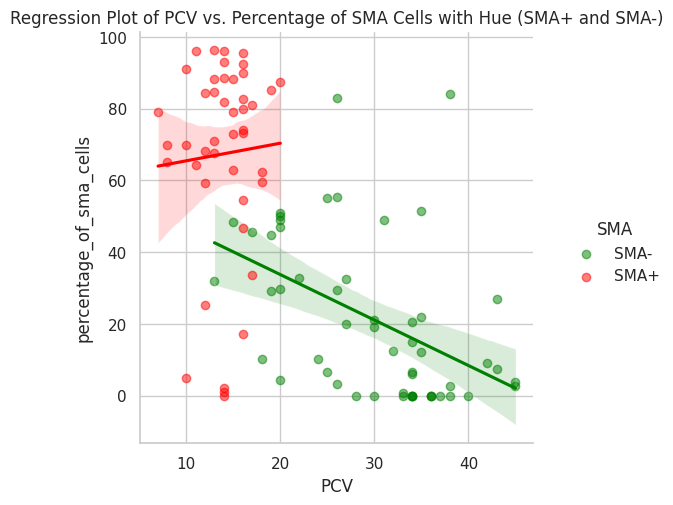

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have result_df_a with the 'PCV' column as integers and no NA values
# Filter the DataFrame based on 'SMA' being equal to 'SMA' or 'NO'
filtered_df = result_df_a[result_df_a['SMA'].isin(['SMA+', 'SMA-'])]

# Regression Plot with Hue
plt.figure(figsize=(10, 6))
sns.lmplot(x='PCV', y='percentage_of_sma_cells', hue='SMA', data=filtered_df, scatter_kws={'alpha': 0.5}, palette={'SMA+': 'red', 'SMA-': 'green'})
plt.title('Regression Plot of PCV vs. Percentage of SMA Cells with Hue (SMA+ and SMA-)')
plt.show()